In [1]:
import numpy as np
import pandas as pd

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
pd.__version__

'2.2.2'

# Reading JSON

In [7]:
folks = pd.read_json('https://andybek.com/pandas-folks-json')

In [8]:
type(folks)

pandas.core.frame.DataFrame

In [9]:
folks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        4 non-null      object
 1   salary      4 non-null      int64 
 2   occupation  4 non-null      object
dtypes: int64(1), object(2)
memory usage: 228.0+ bytes


In [10]:
folks.iloc[2]

name                Mark Prescott
salary                      76400
occupation    Business Consultant
Name: 2, dtype: object

# Reading HTML

In [11]:
# put together a dataframe of european countries and their populations

In [12]:
countries = pd.read_html("https://en.wikipedia.org/wiki/List_of_European_countries_by_population")

In [13]:
type(countries)

list

In [14]:
len(countries)

2

In [16]:
countries[0].head()

,Unnamed: 0,Country / territory,UN estimate (2023),% change,Official figure,Official date,Unnamed: 6
0,1 T,Russia,144444359,−0.2%,146150789,1 Jan 2024[4],[a]
1,2 T,Turkey,85816199,0.1%,85372377,31 Dec 2023[5],NaN
2,3,Germany,83294633,−0.1%,84607016,30 Sep 2023[6],NaN
3,4 T,United Kingdom,67736802,0.3%,67596281,30 Jun 2022[7],[b]
4,5 T,France,64756584,0.2%,68410000,1 Apr 2024[8],[c]


In [22]:
countries = countries[0].loc[:,['Country / territory', 'Official figure', 'UN estimate (2023)']]

In [23]:
countries.head()

,Country / territory,Official figure,UN estimate (2023)
0,Russia,146150789,144444359
1,Turkey,85372377,85816199
2,Germany,84607016,83294633
3,United Kingdom,67596281,67736802
4,France,68410000,64756584


In [24]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Country / territory  56 non-null     object
 1   Official figure      56 non-null     int64 
 2   UN estimate (2023)   56 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.4+ KB


In [28]:
countries.rename({'Country / territory': 'Country', 'Official figure':'Official population', 'UN estimate (2023)': 'Estimated population'}, axis=1, inplace=True)

In [31]:
countries.head()

,Country,Official population,Estimated population
0,Russia,146150789,144444359
1,Turkey,85372377,85816199
2,Germany,84607016,83294633
3,United Kingdom,67596281,67736802
4,France,68410000,64756584


<Axes: xlabel='Country'>

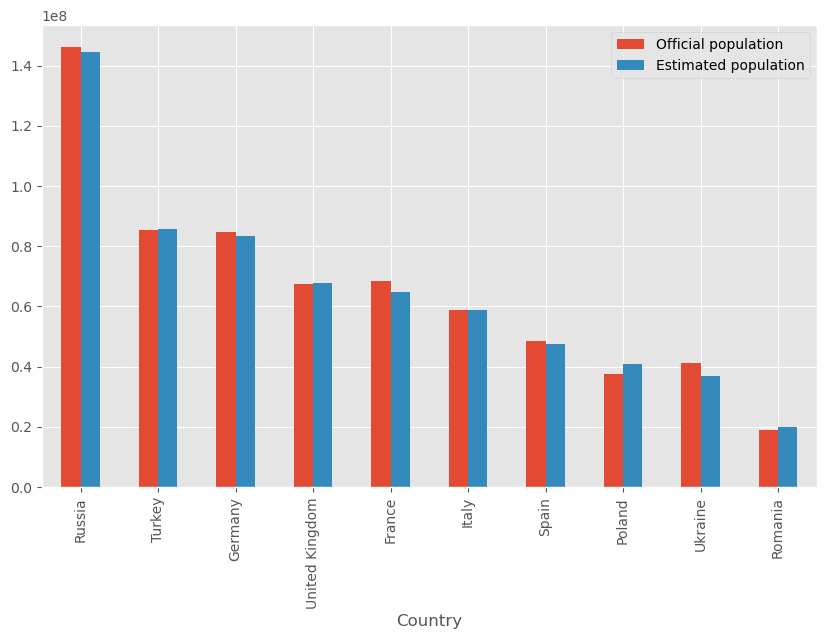

In [37]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

countries.set_index('Country').iloc[:10].plot(kind = 'bar', figsize=(10,6))

# Reading Excel

In [38]:
pd.read_excel("D:/STUDIES/Numpy & Pandas/pandas/all_notebooks/13. Data_Formats_And_I_O.ipynb/folks.xlsx")

,name,salary,occupation
0,Brian Dogood,64000,Software Technician
1,Leah Bokeh,73200,Data Scientist
2,Mark Prescott,76400,Business Consultant
3,Jurgen Gupta,94300,Aerospace Engineer


In [39]:
pd.read_excel("D:/STUDIES/Numpy & Pandas/pandas/all_notebooks/13. Data_Formats_And_I_O.ipynb/folks.xlsx", sheet_name='hobbies')

,name,hobby
0,Brian Dogood,Fishing
1,Leah Bokeh,Skateboarding
2,Mark Prescott,Value Investing
3,Jurgen Gupta,Drawing


In [40]:
pd.read_excel("D:/STUDIES/Numpy & Pandas/pandas/all_notebooks/13. Data_Formats_And_I_O.ipynb/folks.xlsx", 1)

,name,hobby
0,Brian Dogood,Fishing
1,Leah Bokeh,Skateboarding
2,Mark Prescott,Value Investing
3,Jurgen Gupta,Drawing


In [43]:
!pip install xlrd

  Obtaining dependency information for xlrd from https://files.pythonhosted.org/packages/a6/0c/c2a72d51fe56e08a08acc85d13013558a2d793028ae7385448a6ccdfae64/xlrd-2.0.1-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/96.5 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/96.5 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/96.5 kB ? eta -:--:--
   ------------ --------------------------- 30.7/96.5 kB 130.4 kB/s eta 0:00:01
   ---------------- ----------------------- 41.0/96.5 kB 140.3 kB/s eta 0:00:01
   ---------------- ----------------------- 41.0/96.5 kB 140.3 kB/s eta 0:00:01
   ------------------------- -------------- 61.4/96.5 kB 181.6 kB/s eta 0:00:01
   --------------------------------- ------ 81.9/96.5 kB 218.5 kB/s eta 0:00:01
   --------------------------------- ------ 81.9/9

In [42]:
!pip show openpyxl

Name: openpyxl
Version: 3.1.4
Summary: A Python library to read/write Excel 2010 xlsx/xlsm files
Home-page: https://openpyxl.readthedocs.io
Author: See AUTHORS
Author-email: charlie.clark@clark-consulting.eu
License: MIT
Location: C:\Users\hp\anaconda3\Lib\site-packages
Requires: et-xmlfile
Required-by: 


# Creating output: The to_* Family of methods

In [87]:
hobbies = pd.read_excel("D:/STUDIES/Numpy & Pandas/pandas/all_notebooks/13. Data_Formats_And_I_O.ipynb/folks.xlsx", 1)

In [88]:
hobbies

,name,hobby
0,Brian Dogood,Fishing
1,Leah Bokeh,Skateboarding
2,Mark Prescott,Value Investing
3,Jurgen Gupta,Drawing


In [89]:
# add a new person to the hobbies dataframe, save the resulting dataframe to csv

In [91]:
hobbies.loc[4] = ['Zoltan Zachary', 'Archery']

In [92]:
hobbies

,name,hobby
0,Brian Dogood,Fishing
1,Leah Bokeh,Skateboarding
2,Mark Prescott,Value Investing
3,Jurgen Gupta,Drawing
4,Zoltan Zachary,Archery


In [94]:
np.random.uniform(22, 54, 5)

array([25.38725626, 31.90894302, 22.54633066, 44.04056429, 37.66310127])

In [95]:
hobbies['age'] = np.random.uniform(22, 54, 5)

In [96]:
hobbies

,name,hobby,age
0,Brian Dogood,Fishing,52.562121
1,Leah Bokeh,Skateboarding,46.985834
2,Mark Prescott,Value Investing,27.151417
3,Jurgen Gupta,Drawing,46.997684
4,Zoltan Zachary,Archery,43.021076


In [98]:
hobbies.to_csv()

',name,hobby,age\r\n0,Brian Dogood,Fishing,52.56212148660441\r\n1,Leah Bokeh,Skateboarding,46.98583365290461\r\n2,Mark Prescott,Value Investing,27.151416986862795\r\n3,Jurgen Gupta,Drawing,46.99768401028147\r\n4,Zoltan Zachary,Archery,43.021076160031285\r\n'

In [101]:
hobbies.to_csv('hobbies.csv', index=False)

In [102]:
pd.read_csv('hobbies.csv')

,name,hobby,age
0,Brian Dogood,Fishing,52.562121
1,Leah Bokeh,Skateboarding,46.985834
2,Mark Prescott,Value Investing,27.151417
3,Jurgen Gupta,Drawing,46.997684
4,Zoltan Zachary,Archery,43.021076


In [103]:
# how about json

hobbies.to_json()

'{"name":{"0":"Brian Dogood","1":"Leah Bokeh","2":"Mark Prescott","3":"Jurgen Gupta","4":"Zoltan Zachary"},"hobby":{"0":"Fishing","1":"Skateboarding","2":"Value Investing","3":"Drawing","4":"Archery"},"age":{"0":52.5621214866,"1":46.9858336529,"2":27.1514169869,"3":46.9976840103,"4":43.02107616}}'

In [104]:
hobbies.to_json('hobbies.json')

In [ ]:
# HTML

In [105]:
hobbies.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>name</th>\n      <th>hobby</th>\n      <th>age</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>Brian Dogood</td>\n      <td>Fishing</td>\n      <td>52.562121</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>Leah Bokeh</td>\n      <td>Skateboarding</td>\n      <td>46.985834</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>Mark Prescott</td>\n      <td>Value Investing</td>\n      <td>27.151417</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>Jurgen Gupta</td>\n      <td>Drawing</td>\n      <td>46.997684</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>Zoltan Zachary</td>\n      <td>Archery</td>\n      <td>43.021076</td>\n    </tr>\n  </tbody>\n</table>'

In [106]:
print(hobbies.to_html())

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>name</th>
      <th>hobby</th>
      <th>age</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Brian Dogood</td>
      <td>Fishing</td>
      <td>52.562121</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Leah Bokeh</td>
      <td>Skateboarding</td>
      <td>46.985834</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Mark Prescott</td>
      <td>Value Investing</td>
      <td>27.151417</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Jurgen Gupta</td>
      <td>Drawing</td>
      <td>46.997684</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Zoltan Zachary</td>
      <td>Archery</td>
      <td>43.021076</td>
    </tr>
  </tbody>
</table>


# BONUS - Introduction to pickling

In [44]:
googl = {'ticker': 'GOOGL', 'shares': 10, 'book_cost':1540.23}

In [45]:
import pickle

In [46]:
pickle_output = open('my_stock', 'wb')

In [48]:
pickle.dump(googl, pickle_output) 

In [49]:
pickle_output.close()

In [56]:
pickle_input = open('my_stock', 'rb')

In [57]:
stock_dict = pickle.load(pickle_input)

In [58]:
stock_dict

{'ticker': 'GOOGL', 'shares': 10, 'book_cost': 1540.23}

# Pickles in pandas

In [60]:
folio = pd.read_pickle('https://andybek.com/portfolio')

In [61]:
folio.to_pickle('folio')

In [62]:
pd.read_pickle('folio')

,ticker,shares,book_cost
0,AAPL,150,123.23
1,GOOGL,10,1100.00
2,AMGN,230,227.23
3,VET,200,14.24
4,TSLA,100,260.00
5,DX,40,20.01


# Skill challenge

In [71]:
# 1

positions = pd.read_html("https://www.andybek.com/traders")[0]

In [72]:
positions

,TraderID,Instrument,Amount,Trader Location
0,MCBIRN,02079K107,150000,EU
1,WISEA,1350Z74U5,6400000,EU
2,IACOP,GB00B3KJDQ49,2430000,US


In [73]:
type(positions)

pandas.core.frame.DataFrame

In [75]:
# 2

traders = pd.read_json("https://andybek.com/pandas-traders-names")

In [76]:
traders

,names,alias,seniority
0,Shylah McBirney,MCBIRN,Executive
1,Allen Wise,WISEA,Executive
2,Iacopo Brivio,IACOP,Junior
3,Allison Carter,CARTERA,Mid-level


In [83]:
# 3

mrgd = positions.merge(traders, left_on='TraderID', right_on='alias').drop('alias', axis=1)

In [84]:
# 4

mrgd.to_pickle('pickled_traders')

In [85]:
mrgd.to_csv('traders.csv')